# Import necessary lib

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('data/Training.csv')
df = df.drop('Unnamed: 133', axis=1)

In [33]:
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

In [34]:
y = df['prognosis']
X = df.drop('prognosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3936, 132), (984, 132), (3936,), (984,))

# Using 3 models (Random Forest, SVM and GaussianNB) to evaluate data prediction

Accuracy on Test with SVM model100.0
Accuracy on Train with SVM model100.0


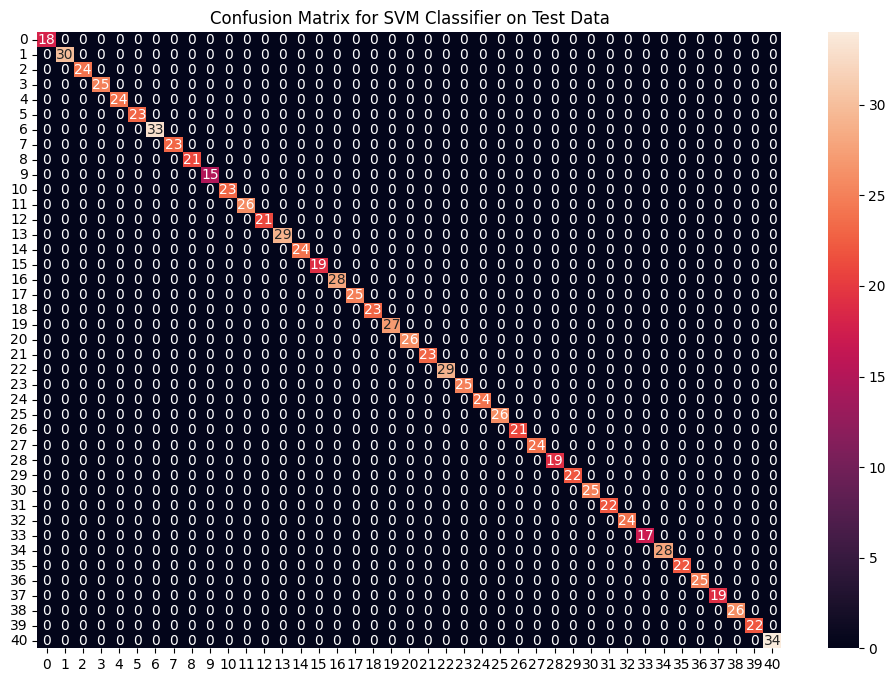

Accuracy on Test with GaussianNB model100.0
Accuracy on Train with GaussianNB model100.0


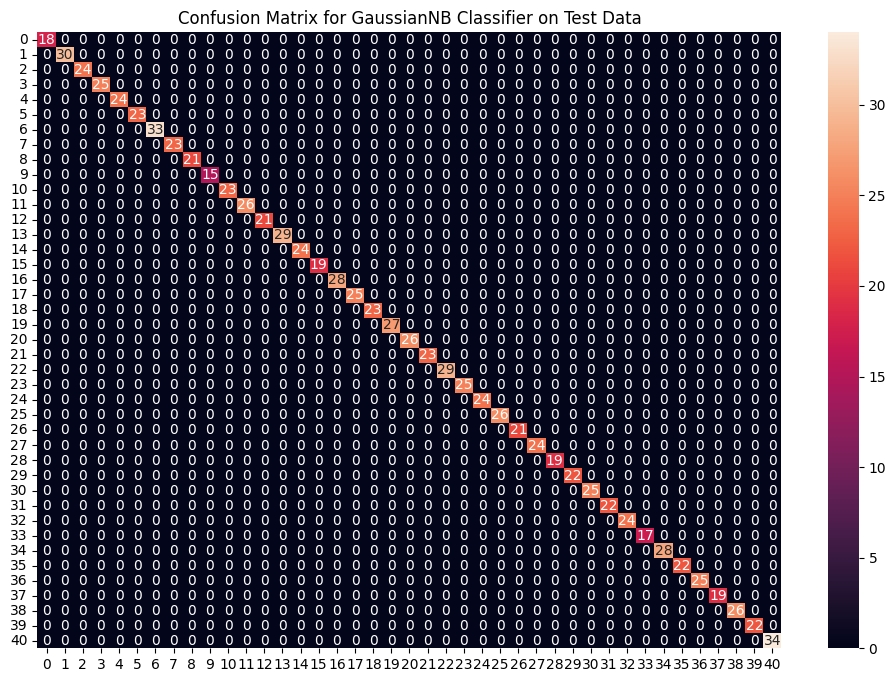

Accuracy on Test with RandomForestClassifier model100.0
Accuracy on Train with RandomForestClassifier model100.0


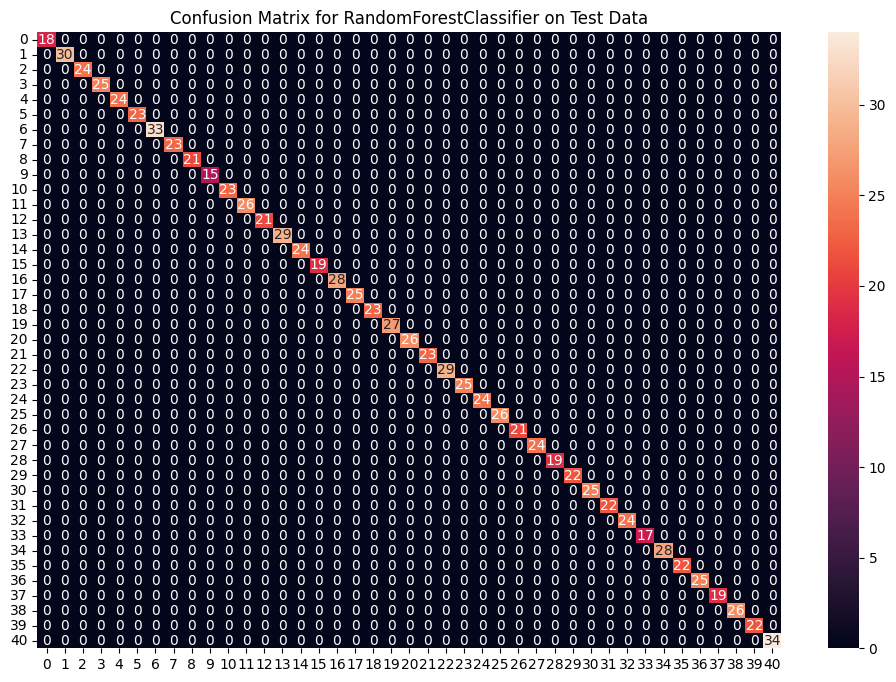

In [35]:
# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f"Accuracy on Test with SVM model{accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on Train with SVM model{accuracy_score(y_test, y_pred_svm)*100}")
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_svm, annot=True)
plt.title('Confusion Matrix for SVM Classifier on Test Data')
plt.show()

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
print(f"Accuracy on Test with GaussianNB model{accuracy_score(y_train, gnb_model.predict(X_train))*100}")
print(f"Accuracy on Train with GaussianNB model{accuracy_score(y_test, y_pred_svm)*100}")
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_svm, annot=True)
plt.title('Confusion Matrix for GaussianNB Classifier on Test Data')
plt.show()

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy on Test with RandomForestClassifier model{accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on Train with RandomForestClassifier model{accuracy_score(y_test, y_pred_svm)*100}")
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_svm, annot=True)
plt.title('Confusion Matrix for RandomForestClassifier on Test Data')
plt.show()

# Training model with 3 algorithms and evaluate with test data

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of uni

Accuracy on Test Dataset by the combined model: 100.0


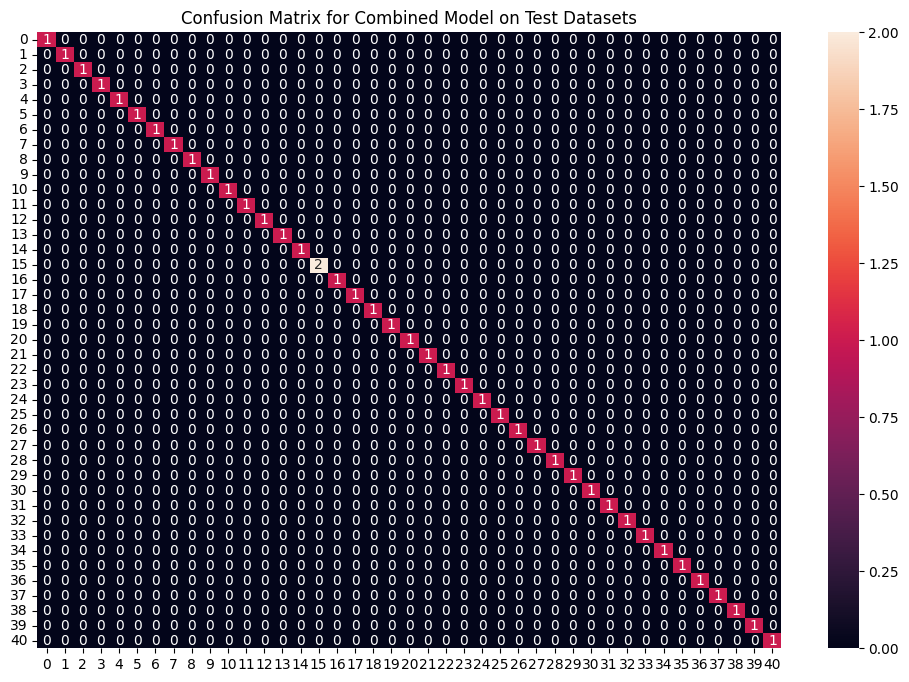

In [ ]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

#reading test data
test_data = pd.read_csv('data/Testing.csv').dropna(axis=1)
test_y = test_data['prognosis']
test_X = test_data.drop('prognosis', axis=1)

#test_y label encode

test_y = encoder.transform(test_y)

#Make Prediction
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [stats.mode([i, j, k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]
print(f"Accuracy on Test Dataset by the combined model: {accuracy_score(test_y, final_preds)*100}")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Datasets")
plt.show()

# Export models with joblib

In [37]:
import joblib

joblib.dump(final_svm_model, "svm_model.pkl")
joblib.dump(final_nb_model, "nb_model.pkl")
joblib.dump(final_rf_model, "rf_model.pkl")
joblib.dump(encoder, "label_encoder.pkl")
joblib.dump(data_dict, "data_dict.pkl")


['data_dict.pkl']